In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
df.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [5]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [6]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [7]:
x=df.iloc[:,[0,2,3,4,5,6]].values
y=df.iloc[:,1].values

<Axes: xlabel='Species', ylabel='count'>

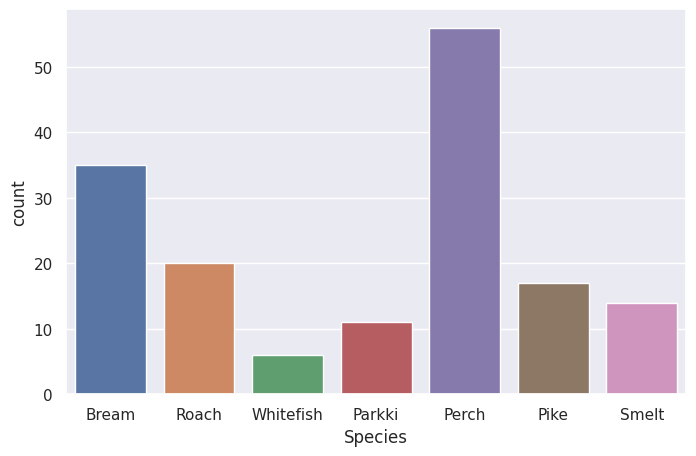

In [8]:
sns.set(rc={'figure.figsize':(8,5)})
sns.countplot(data=df,x='Species')

<Axes: xlabel='Weight'>

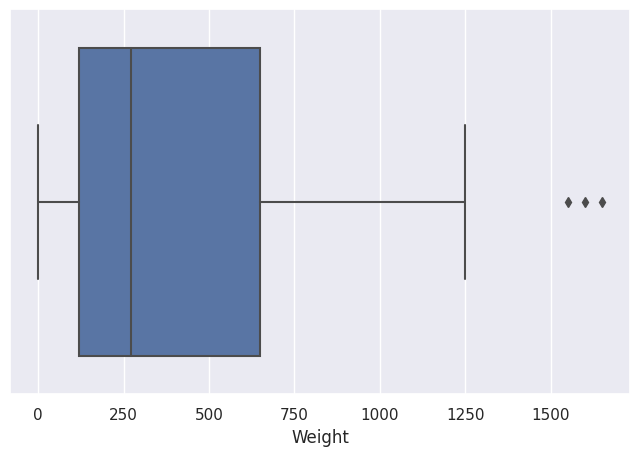

In [9]:
sns.boxplot(data=df,x='Weight')

<Axes: xlabel='Length1'>

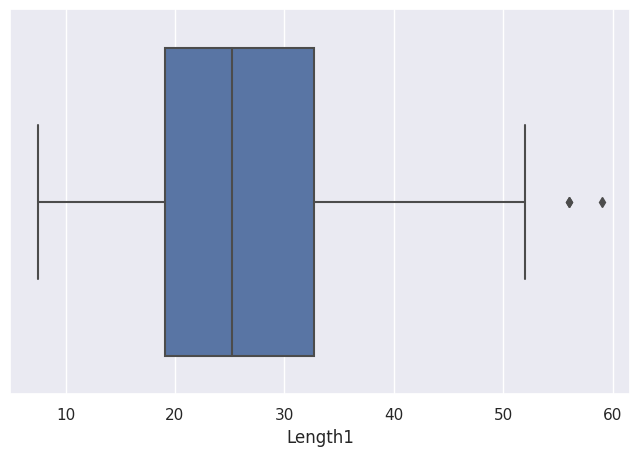

In [10]:
sns.boxplot(data=df,x='Length1')

<Axes: xlabel='Length2'>

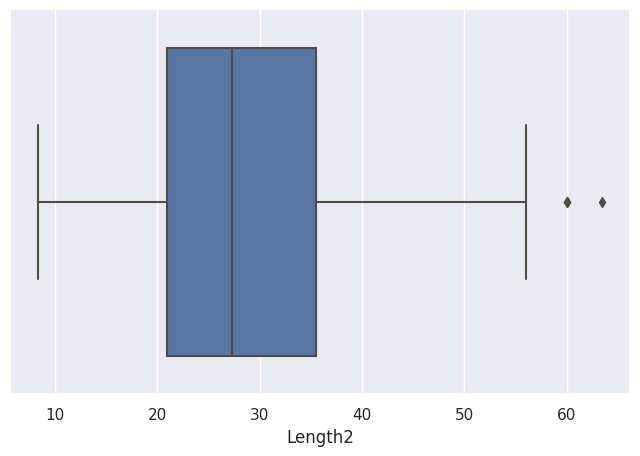

In [11]:
sns.boxplot(data=df,x='Length2')

<Axes: xlabel='Length3'>

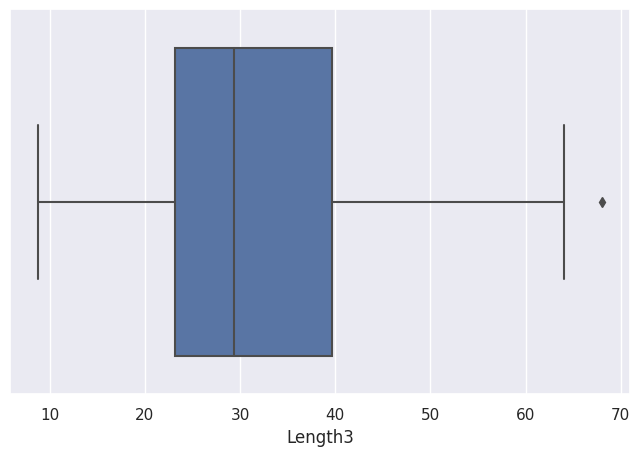

In [12]:
sns.boxplot(data=df,x='Length3')

<Axes: xlabel='Width'>

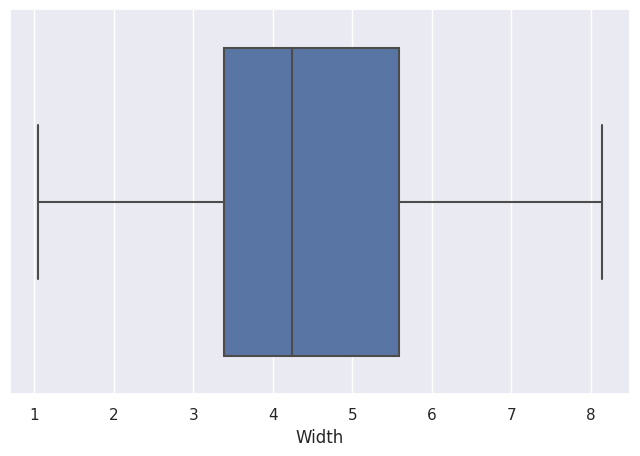

In [13]:
sns.boxplot(data=df,x='Width')

<Axes: xlabel='Height'>

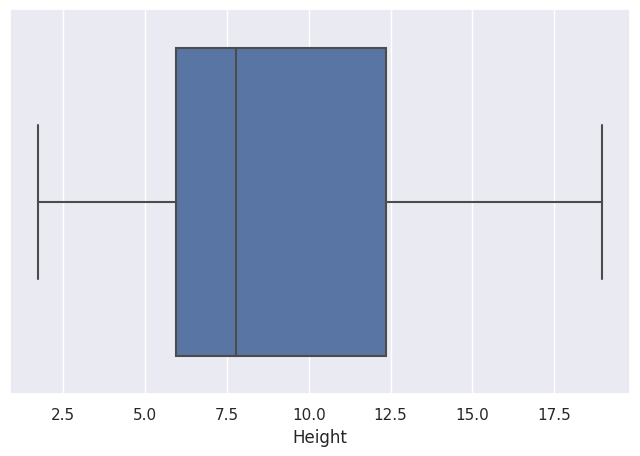

In [14]:
sns.boxplot(data=df,x='Height')

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')
x=np.array(ct.fit_transform(x))
print(x)

[[1.0 0.0 0.0 ... 30.0 11.52 4.02]
 [1.0 0.0 0.0 ... 31.2 12.48 4.3056]
 [1.0 0.0 0.0 ... 31.1 12.3778 4.6961]
 ...
 [0.0 0.0 0.0 ... 13.8 2.277 1.2558]
 [0.0 0.0 0.0 ... 15.2 2.8728 2.0672]
 [0.0 0.0 0.0 ... 16.2 2.9322 1.8792]]


In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [17]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
sc_y=StandardScaler()
x_train[:,7:]=sc_x.fit_transform(x_train[:,7:])
x_test[:,7:]=sc_x.transform(x_test[:,7:])
y_train=sc_y.fit_transform(y_train.reshape(-1,1))
y_test=sc_y.transform(y_test.reshape(-1,1))

In [18]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [19]:
y_pred_test=reg.predict(x_test)

In [20]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("Mean Squared Error =",mean_squared_error(y_test,y_pred_test))
print("Mean Absolute Error =",mean_absolute_error(y_test,y_pred_test))
print("R2 Score =",r2_score(y_test,y_pred_test))

Mean Squared Error = 0.09643905554946969
Mean Absolute Error = 0.24848619803618768
R2 Score = 0.910934258580729
